# Label Encoding
## ยิงแปลงค่าได้ดีแค่ไหน model จะยิ่งดีมากขึ้น
### https://colab.research.google.com/drive/17EzwLvaF_SqCAEfN1tztDOSVhLX5q1pn?usp=sharing
### https://academy.bottomliner.co/course/machine-learning-for-investing-101/lessons/label-encoding/

In [1]:
from sklearn import preprocessing
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
diabetes = datasets.load_diabetes(as_frame= True)
diabetes

{'data':           age       sex       bmi        bp        s1        s2        s3  \
 0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
 1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
 2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
 3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
 4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
 ..        ...       ...       ...       ...       ...       ...       ...   
 437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
 438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
 439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
 440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
 441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   
 
            s4        s5        s6  
 0   -0.002592  0

In [3]:
diabetes.data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [4]:
diabetes.data.sex = diabetes.data.sex.apply(lambda x: 'male' if x > 0 else 'female')

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:5507: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


### encoding มีทั้งแบบใช้ libraly หรือ ทำด้วยมือ

In [5]:
diabetes.data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,male,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,female,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,male,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,female,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,female,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,male,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,male,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,male,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,female,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [6]:
df = diabetes.data
df.sex[df.sex =='male'] = 1

<ipython-input-6-1dda80649757>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sex[df.sex =='male'] = 1
C:\Anaconda3\lib\site-packages\pandas\core\generic.py:8861: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [7]:
df.loc[df.sex == 'female', 'sex'] = 2

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [8]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,1,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,2,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,1,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,2,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,2,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['paris', 'paris', 'tokyo', 'amsterdam'])

LabelEncoder()

In [10]:
le.transform(['tokyo', 'tokyo', 'paris'])

array([2, 2, 1])

In [11]:
a = ['paris', 'paris', 'tokyo', 'amsterdam']
le.transform(a)

array([1, 1, 2, 0])

In [12]:
le.fit_transform(a)

array([1, 1, 2, 0], dtype=int64)

## ข้อมูลจริงการเงิน หากค่าเท่าๆกัน มันจะเลี่ยงไปใช้ one hot enconding

In [13]:
import yfinance as yf

In [14]:
data = yf.download('SPY', period= '10y')

[*********************100%***********************]  1 of 1 completed


In [15]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-17,130.080002,130.320007,128.899994,129.339996,106.796158,132209200
2012-01-18,129.309998,130.839996,129.080002,130.770004,107.976883,163395200
2012-01-19,131.220001,131.570007,130.800003,131.460007,108.546654,126328900
2012-01-20,131.240005,131.949997,130.919998,131.949997,108.951225,138230200
2012-01-23,131.509995,132.250000,130.979996,131.610001,108.670494,129295800
...,...,...,...,...,...,...
2022-01-07,467.950012,469.200012,464.649994,466.089996,466.089996,85064800
2022-01-10,462.700012,465.739990,456.600006,465.510010,465.510010,119189600
2022-01-11,465.230011,469.850006,462.049988,469.750000,469.750000,74303100


In [16]:
df_spy = data[['Close', 'Volume']]

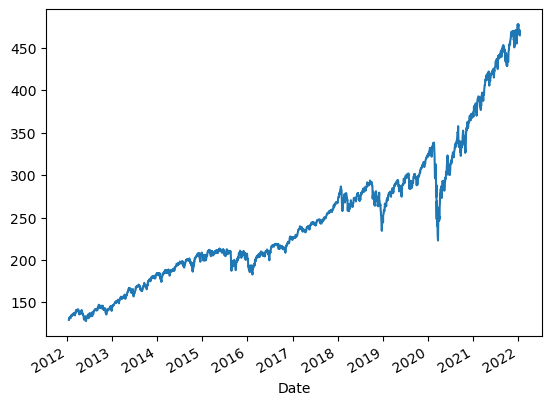

In [17]:
df_spy.Close.plot()
plt.show()

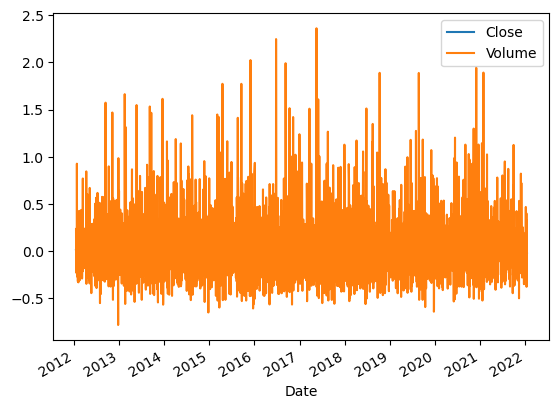

In [18]:
df_ret_1d = df_spy.pct_change()
df_ret_1d.plot()
plt.show()

In [19]:
df_ret_1d > 0

,Close,Volume
Date,,
2012-01-17,False,False
2012-01-18,True,True
2012-01-19,True,False
2012-01-20,True,True
2012-01-23,False,False
...,...,...
2022-01-07,False,False
2022-01-10,False,True
2022-01-11,True,False


In [20]:
df_ret_1d['both_up'] = 0
df_ret_1d

,Close,Volume,both_up
Date,,,
2012-01-17,NaN,NaN,0
2012-01-18,0.011056,0.235884,0
2012-01-19,0.005276,-0.226851,0
2012-01-20,0.003727,0.094209,0
2012-01-23,-0.002577,-0.064634,0
...,...,...,...
2022-01-07,-0.003954,-0.020655,0
2022-01-10,-0.001244,0.401162,0
2022-01-11,0.009108,-0.376597,0


In [21]:
df_ret_1d['both_up'] = 0

In [22]:
df_ret_1d['both_up'] = 0
df_ret_1d.loc[(df_ret_1d['Close'] > 0 ) & (df_ret_1d['Volume'] > 0), 'both_up'] = 1
df_ret_1d.loc[(df_ret_1d['Close'] < 0 ) & (df_ret_1d['Volume'] < 0), 'both_up'] = -1

In [23]:
df_ret_1d

,Close,Volume,both_up
Date,,,
2012-01-17,NaN,NaN,0
2012-01-18,0.011056,0.235884,1
2012-01-19,0.005276,-0.226851,0
2012-01-20,0.003727,0.094209,1
2012-01-23,-0.002577,-0.064634,-1
...,...,...,...
2022-01-07,-0.003954,-0.020655,-1
2022-01-10,-0.001244,0.401162,0
2022-01-11,0.009108,-0.376597,0


In [24]:
data['5d_avg_vol'] = data.Volume.rolling(window= 5).mean()

In [25]:
data

,Open,High,Low,Close,Adj Close,Volume,5d_avg_vol
Date,,,,,,,
2012-01-17,130.080002,130.320007,128.899994,129.339996,106.796158,132209200,NaN
2012-01-18,129.309998,130.839996,129.080002,130.770004,107.976883,163395200,NaN
2012-01-19,131.220001,131.570007,130.800003,131.460007,108.546654,126328900,NaN
2012-01-20,131.240005,131.949997,130.919998,131.949997,108.951225,138230200,NaN
2012-01-23,131.509995,132.250000,130.979996,131.610001,108.670494,129295800,137891860.0
...,...,...,...,...,...,...,...
2022-01-07,467.950012,469.200012,464.649994,466.089996,466.089996,85064800,84061900.0
2022-01-10,462.700012,465.739990,456.600006,465.510010,465.510010,119189600,93366180.0
2022-01-11,465.230011,469.850006,462.049988,469.750000,469.750000,74303100,93991060.0


In [26]:
data.loc[data.Volume > data['5d_avg_vol'], 'upper_or_lower'] = 1
data.loc[data.Volume < data['5d_avg_vol'], 'upper_or_lower'] = 0
data.dropna().head(10)

,Open,High,Low,Close,Adj Close,Volume,5d_avg_vol,upper_or_lower
Date,,,,,,,,
2012-01-23,131.509995,132.250000,130.979996,131.610001,108.670494,129295800,137891860.0,0.0
2012-01-24,130.800003,131.500000,130.600006,131.460007,108.546654,103083300,132066680.0,0.0
2012-01-25,131.259995,132.869995,130.750000,132.559998,109.454910,198613200,139110280.0,1.0
2012-01-26,133.149994,133.399994,131.360001,131.880005,108.893456,184880500,150820600.0,1.0
2012-01-27,131.240005,132.050003,131.149994,131.820007,108.843849,135259100,150226380.0,0.0
2012-01-30,130.509995,131.440002,130.059998,131.369995,108.472321,147311800,153829580.0,0.0
2012-01-31,132.020004,132.179993,130.679993,131.320007,108.431038,157212000,164655320.0,0.0
2012-02-01,132.289993,133.139999,132.130005,132.470001,109.380623,166234500,158179580.0,1.0
2012-02-02,132.729996,133.020004,132.210007,132.679993,109.553963,113090400,143821560.0,0.0


In [27]:
# จัดขั้นลำดับ ว่าเปลี่ยนเท่าไหล่จึง trigger 
df_ret_1d.Close.apply(lambda x: 1 if x > 0.02 else 0)

Date
2012-01-17    0
2012-01-18    0
2012-01-19    0
2012-01-20    0
2012-01-23    0
             ..
2022-01-07    0
2022-01-10    0
2022-01-11    0
2022-01-12    0
2022-01-14    0
Name: Close, Length: 2517, dtype: int64

In [28]:
# เปลี่ยนจาก specific number เป็น Range ให้มันมีความเป็น class มากขึ้น เพราะ 10 20 เปอร์เซ็นต์ บางทีมันต่างกันอย่างไม่เป็น Linear
def myrange(ret):
    if ret <= -0.02:
        return -2
    elif (ret > -0.02) & (ret < 0):
        return -1
    elif (ret >= 0) & (ret < 0.02):
        return 1
    elif ret >= 0.02:
        return 2

In [29]:
df_ret_1d.Close.apply(myrange)

Date
2012-01-17    NaN
2012-01-18    1.0
2012-01-19    1.0
2012-01-20    1.0
2012-01-23   -1.0
             ... 
2022-01-07   -1.0
2022-01-10   -1.0
2022-01-11    1.0
2022-01-12    1.0
2022-01-14   -1.0
Name: Close, Length: 2517, dtype: float64

In [30]:
df_ret_1d['price_score'] = df_ret_1d.Close.apply(myrange)

In [31]:
df_ret_1d

,Close,Volume,both_up,price_score
Date,,,,
2012-01-17,NaN,NaN,0,NaN
2012-01-18,0.011056,0.235884,1,1.0
2012-01-19,0.005276,-0.226851,0,1.0
2012-01-20,0.003727,0.094209,1,1.0
2012-01-23,-0.002577,-0.064634,-1,-1.0
...,...,...,...,...
2022-01-07,-0.003954,-0.020655,-1,-1.0
2022-01-10,-0.001244,0.401162,0,-1.0
2022-01-11,0.009108,-0.376597,0,1.0


# One Hot Encoder

## sklearn method
### เก็บค่าไว้ใช้ได้ ได้ข้อมูลมาเป็น array , แยก fit tranform, 

In [32]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

In [33]:
diabetes = datasets.load_diabetes(as_frame= True)

In [34]:
diabetes.data.sex

0      0.050680
1     -0.044642
2      0.050680
3     -0.044642
4     -0.044642
         ...   
437    0.050680
438    0.050680
439    0.050680
440   -0.044642
441   -0.044642
Name: sex, Length: 442, dtype: float64

In [35]:
sex = diabetes.data.sex.apply(lambda x: 'male' if x > 0 else 'female')

In [37]:
sex

0        male
1      female
2        male
3      female
4      female
        ...  
437      male
438      male
439      male
440    female
441    female
Name: sex, Length: 442, dtype: object

In [ ]:
enc.fit(sex)
enc.transform(sex)

In [ ]:
sex.values.reshape(-1, 1)

In [ ]:
enc.fit_transform(sex.values.reshape(-1, 1))

<442x2 sparse matrix of type '<class 'numpy.float64'>'
	with 442 stored elements in Compressed Sparse Row format>

In [ ]:
enc.fit_transform(sex.values.reshape(-1, 1)).toarray()

In [ ]:
pd.DataFrame(enc.fit_transform(sex.values.reshape(-1, 1)).toarray(), columns=['male', 'female'])

,male,female
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
...,...,...
437,0.0,1.0
438,0.0,1.0
439,0.0,1.0
440,1.0,0.0


In [ ]:
test_sex = ['male', 'female', 'LGBT', 'unknown']

In [ ]:
# reshape from list to be array to have values
test_sex_array = np.reshape(test_sex, (-1, 1))

In [ ]:
# encoder to be float
sex_encoded = enc.fit_transform(test_sex_array).toarray()

In [ ]:
df_sex_encoded = pd.DataFrame(sex_encoded)

In [ ]:
df_sex_encoded

,0,1,2,3
0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0


## Pandas method
### ข้อเสีย เป็น fit and tranforms เลย  
### ข้อดี สดวก สามารถยัดไปใช้ได้เลย

In [ ]:
pd.get_dummies(test_sex)

,LGBT,female,male,unknown
0,0,0,1,0
1,0,1,0,0
2,1,0,0,0
3,0,0,0,1
